In [8]:
import pandas as pd
import numpy as np
from functools import partial

from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score,precision_score, classification_report
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os

from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [2]:
# save np.load
np_load_old = partial(np.load)

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [9]:
# restore np.load for future normal usage
np.load = np_load_old

# Word2Vec

# features = 300

In [15]:
X_train = np.load('X_trainingset.npy')
y_train = np.load('y_trainingset.npy')
X_val = np.load('X_validationset.npy')
y_val = np.load('y_validationset.npy')

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(14475, 300)
(14475,)
(3619, 300)
(3619,)


In [38]:
# MultinomialNB는 negative value X
# [0, 1]로 정규화
min_max_scaler = MinMaxScaler()
X_nomal_train = min_max_scaler.fit_transform(X_train)

mnbModel = MultinomialNB(alpha = 0.01)
mnbModel.fit(X_nomal_train, y_train)
mnbModel.score(X_nomal_train, y_train)

0.44469775474956824

# features = 1000

In [60]:
X_train = np.load('X_trainingset3.npy')
y_train = np.load('y_trainingset3.npy')
X_val = np.load('X_validationset3.npy')
y_val = np.load('y_validationset3.npy')

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(14475, 1000)
(14475,)
(3619, 1000)
(3619,)


In [62]:
# MultinomialNB는 negative value X
# [0, 1]로 정규화
min_max_scaler = MinMaxScaler()
X_nomal_train = min_max_scaler.fit_transform(X_train)

mnbModel = MultinomialNB(alpha = 0.01)
mnbModel.fit(X_nomal_train, y_train)
mnbModel.score(X_nomal_train, y_train)

0.44649395509499135

# features = 600

In [63]:
X_train = np.load('X_trainingset4.npy')
y_train = np.load('y_trainingset4.npy')
X_val = np.load('X_validationset4.npy')
y_val = np.load('y_validationset4.npy')

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(14475, 600)
(14475,)
(3619, 600)
(3619,)


In [65]:
# MultinomialNB는 negative value X
# [0, 1]로 정규화
min_max_scaler = MinMaxScaler()
X_nomal_train = min_max_scaler.fit_transform(X_train)

mnbModel = MultinomialNB(alpha = 0.01)
mnbModel.fit(X_nomal_train, y_train)
mnbModel.score(X_nomal_train, y_train)

0.44649395509499135

# features = 400

In [66]:
X_train = np.load('X_trainingset5.npy')
y_train = np.load('y_trainingset5.npy')
X_val = np.load('X_validationset5.npy')
y_val = np.load('y_validationset5.npy')

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(14475, 400)
(14475,)
(3619, 400)
(3619,)


In [68]:
# MultinomialNB는 negative value X
# [0, 1]로 정규화
min_max_scaler = MinMaxScaler()
X_nomal_train = min_max_scaler.fit_transform(X_train)

mnbModel = MultinomialNB(alpha = 0.01)
mnbModel.fit(X_nomal_train, y_train)
mnbModel.score(X_nomal_train, y_train)

0.44649395509499135

# features = 350

In [63]:
X_train = np.load('X_trainingset_w2v.npy')
y_train = np.load('y_trainingset_w2v.npy')
X_val = np.load('X_validationset_w2v.npy')
y_val = np.load('y_validationset_w2v.npy')

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(57689, 350)
(57689,)
(14423, 350)
(14423,)


In [61]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
np.nan_to_num(X_train, nan = 0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
np.nan_to_num(var, copy=False)
print(var)

[ 65500. -65500.]


In [67]:
# MultinomialNB는 negative value X
# [0, 1]로 정규화
X_train = np.nan_to_num(X_train, nan = 0)
mnbModel = MultinomialNB(alpha = 0.1)
mnbModel.fit(X_train, y_train)
mnbModel.score(X_train, y_train)

0.4206521173880636

# alpha값에 따른 변화 x

In [24]:
# MultinomialNB는 negative value X
# [0, 1]로 정규화
min_max_scaler = MinMaxScaler()
X_nomal_train = min_max_scaler.fit_transform(X_train)

gnbModel = GaussianNB()
gnbModel.fit(X_nomal_train, y_train)
gnbModel.score(X_nomal_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# word2vec 벡터 평균 말고 다른 방법으로 해보기

# Tf-idf

# 1) Hannanum

In [8]:
data = pd.read_excel('tokenization.xlsx')
text = data['Hannanum'].copy()

In [7]:
preData =pd.read_excel('preprocessing_data_af_rm_kw.xlsx')
sentences = preData['sentence']

In [18]:
preData.shape

(90141, 7)

In [12]:
for i, t in enumerate(text):
    text[i] = str(t)

In [69]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text)

In [70]:
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [346]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 10000)
X = tfidf_vectorizer.fit_transform(text)

In [347]:
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train8, X_test8, y_train8, y_test8 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train8, X_val8, y_train8, y_val8 = train_test_split(X_train8, y_train8, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# 2) Okt

In [137]:
text2 = data['Okt'].copy()
for i, t in enumerate(text2):
    text2[i] = str(t)

In [138]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text2)

In [139]:
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# 3) Hannanum2

In [200]:
data2 = pd.read_excel('tokenization2.xlsx')
text3 = data2['Hannanum'].copy()
for i, t in enumerate(text3):
    text3[i] = str(t)

In [201]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text3)

In [202]:
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [221]:
print(X_train3)

  (0, 116)	0.08084782180104927
  (0, 157)	0.09580117770178317
  (0, 415)	0.09918011475288462
  (0, 436)	0.09966514373917827
  (0, 503)	0.12186181739960136
  (0, 649)	0.08537033356817093
  (0, 676)	0.12275340228730729
  (0, 790)	0.07916556586927914
  (0, 833)	0.10438436224917227
  (0, 946)	0.08167701150537716
  (0, 949)	0.1889543771316076
  (0, 967)	0.22874007671926808
  (0, 968)	0.34744402625500864
  (0, 1034)	0.1257893136133001
  (0, 1112)	0.11170232789989931
  (0, 1120)	0.13202866425639226
  (0, 1184)	0.3411305964268848
  (0, 1332)	0.12317760367089654
  (0, 1397)	0.11161501002636287
  (0, 1478)	0.19528697147908533
  (0, 1513)	0.18354165545256562
  (0, 1514)	0.1257893136133001
  (0, 1700)	0.0887699570985288
  (0, 1726)	0.1554296851567785
  (0, 1956)	0.08736970184878745
  :	:
  (57688, 652)	0.3270226564531866
  (57688, 817)	0.13536063896958977
  (57688, 854)	0.10168451199905494
  (57688, 1498)	0.2619725843120845
  (57688, 1499)	0.2902269001490389
  (57688, 1538)	0.22073910085930218
  (

# 4) Hannanum3

In [274]:
data3 = pd.read_excel('tokenization3.xlsx')
text4 = data3['Hannanum'].copy()
for i, t in enumerate(text4):
    text4[i] = str(t)

In [288]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text4)

In [307]:
sentences = preData['sentence']
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# Dataset split: class(징역/무기징역, 무죄/벌금/집행유예)

# 1) Hannanum

In [4]:
data = pd.read_excel('tokenization.xlsx')
text = data['Hannanum'].copy()

In [5]:
preData =pd.read_excel('preprocessing_data_af_rm_kw.xlsx')
sentences = preData['sentence3']

In [6]:
for i, t in enumerate(text):
    text[i] = str(t)

In [14]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text)

In [15]:
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train5, X_val5, y_train5, y_val5 = train_test_split(X_train5, y_train5, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 10000)
X = tfidf_vectorizer.fit_transform(text)

In [349]:
sentences = preData['sentence3']
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train8, X_test8, y_train8, y_test8 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train8, X_val8, y_train8, y_val8 = train_test_split(X_train8, y_train8, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [7]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 7000)
X = tfidf_vectorizer.fit_transform(text)

In [8]:
sentences = preData['sentence3']
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train9, X_test9, y_train9, y_test9 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train9, X_val9, y_train9, y_val9 = train_test_split(X_train9, y_train9, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# 2) Okt

In [ ]:
text2 = data['Okt'].copy()
for i, t in enumerate(text2):
    text2[i] = str(t)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text2)

In [ ]:
sentences = preData['sentence3']
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train6, X_val6, y_train6, y_val6 = train_test_split(X_train6, y_train6, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# 3) Hannanum3

In [ ]:
data3 = pd.read_excel('tokenization3.xlsx')
text4 = data3['Hannanum'].copy()
for i, t in enumerate(text4):
    text4[i] = str(t)

In [300]:
text4

0        대법원 문건 무단 유출 등 1심 증거 범죄고의 검찰 1심 임종헌 번복 술 수용 대법...
1        검찰 내 나 폭 검찰 세상 고통 후배 검사 성추행 인사 불이익 로 안태근 전 법무부...
2        회식 후 술 정규직 여직원 성폭행한 로 30대 전 은행원 대법원 을 확정 대법원 3...
3        직권남용 서지현 인사 불이익 1심 인사 불이익 2심 항소기각 대법 취지 환송 파기환...
4        1심 판결 후 항소심 등 윤한홍 국민의힘 의원 7일 오후 서울 여의 국회 법제사법위...
                               ...                        
90136    서울지검 공안1부 이상형검사 28일 남한사회주의 노동자동맹 사노맹 사건 단체 중앙위...
90137    서울지검 남부지청피해자 합의 고소 단순강간범 검찰 신설 특정범죄 가중처벌법상 특수강...
90138    일반 형사범 행형성적 고려 선별구제 가정파괴범 일벌백계 로 대상 제외법무부 20일 ...
90139    삼호기획 대표 공범 4명 도피자금 주류도매상 살해교사서울지검 강력부 강신욱부장 김종...
90140    미국 동생 아들 소생 정인숙양 살해한 죄 을 동안 복역 11 석가탄신일 가석방 정양...
Name: Hannanum, Length: 90141, dtype: object

In [301]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text4)

In [302]:
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train7, X_val7, y_train7, y_val7 = train_test_split(X_train7, y_train7, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# 4) Kkma

In [ ]:
data = pd.read_excel('tokenization.xlsx', index_col = 0)

In [9]:
text5 = data['Kkma'].copy()
for i, t in enumerate(text5):
    text5[i] = str(t)

In [10]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text5)

In [11]:
sentences = preData['sentence3']
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# Dataset split:class == 유죄, 무죄

In [9]:
data = pd.read_excel('tokenization.xlsx', index_col = 0)
text = data['Hannanum'].copy()

In [10]:
preData =pd.read_excel('preprocessing_data_af_rm_kw.xlsx', index_col = 0)
sentences = preData['sentence4']

In [11]:
for i, t in enumerate(text):
    text[i] = str(t)

In [12]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 5000)
X = tfidf_vectorizer.fit_transform(text)

In [13]:
sentences = preData['sentence4']
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [7]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 6000)
X = tfidf_vectorizer.fit_transform(text)

In [8]:
sentences = preData['sentence4']
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_train_3, y_train_3, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [28]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3), max_features = 7000)
X = tfidf_vectorizer.fit_transform(text)

In [29]:
sentences = preData['sentence4']
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train_4, X_val_4, y_train_4, y_val_4 = train_test_split(X_train_3, y_train_3, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

# resampling

In [27]:
scaler = MaxAbsScaler()
scaler.fit_transform(X_train_2)
X_train_tmp = scaler.fit_transform(X_train_2)

In [29]:
# 모델설정
sm = SMOTE()

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X_train_tmp,list(y_train_2))

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(y_resampled.count('유죄')))
print("After OverSampling, counts of label '0': {}".format(y_resampled.count('무죄')))

After OverSampling, the shape of train_X: (97938, 5000)
After OverSampling, the shape of train_y: (97938, 5000) 

After OverSampling, counts of label '1': 48969
After OverSampling, counts of label '0': 48969


In [318]:
# Hannanum, Tf-idf
np.save('X_train', X_train)
np.save('X_val', X_val)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_val', y_val)
np.save('y_test', y_test)

# Okt, Tf-idf
np.save('X_train2', X_train2)
np.save('X_val2', X_val2)
np.save('X_test2', X_test2)
np.save('y_train2', y_train2)
np.save('y_val2', y_val2)
np.save('y_test2', y_test2)

# Hannanum2, Tf-idf
np.save('X_train3', X_train3)
np.save('X_val3', X_val3)
np.save('X_test3', X_test3)
np.save('y_train3', y_train3)
np.save('y_val3', y_val3)
np.save('y_test3', y_test3)

# Hannanum3, Tf-idf
np.save('X_train4', X_train4)
np.save('X_val4', X_val4)
np.save('X_test4', X_test4)
np.save('y_train4', y_train4)
np.save('y_val4', y_val4)
np.save('y_test4', y_test4)

# Hannanum, Tf-idf, class == 무기징역/징역, another
np.save('X_train5', X_train5)
np.save('X_val5', X_val5)
np.save('X_test5', X_test5)
np.save('y_train5', y_train5)
np.save('y_val5', y_val5)
np.save('y_test5', y_test5)

# Okt, Tf-idf, class == 무기징역/징역, another
np.save('X_train6', X_train6)
np.save('X_val6', X_val6)
np.save('X_test6', X_test6)
np.save('y_train6', y_train6)
np.save('y_val6', y_val6)
np.save('y_test6', y_test6)

# Hannanum2, Tf-idf, class == 무기징역/징역, another
np.save('X_train7', X_train7)
np.save('X_val7', X_val7)
np.save('X_test7', X_test7)
np.save('y_train7', y_train7)
np.save('y_val7', y_val7)
np.save('y_test7', y_test7)

In [356]:
# Hannanum, Tf-idf(max_featrues = 10000)
np.save('X_train8', X_train8)
np.save('X_val8', X_val8)
np.save('X_test8', X_test8)
np.save('y_train8', y_train8)
np.save('y_val8', y_val8)
np.save('y_test8', y_test8)

# Hannanum, Tf-idf(max_features = 7000)
np.save('X_train9', X_train9)
np.save('X_val9', X_val9)
np.save('X_test9', X_test9)
np.save('y_train9', y_train9)
np.save('y_val9', y_val9)
np.save('y_test9', y_test9)

# Multinomial Naive bayes

# 1) Hannanum, Tf-idf

In [227]:
mnbModel = MultinomialNB(alpha = 0.1)
mnbModel.fit(X_train, y_train)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train, y_train)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val, y_val)))


trainingset accuracy : 0.561

testset accuracy : 0.549


In [278]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train, y_train)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train, y_train)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val, y_val)))


trainingset accuracy : 0.560

testset accuracy : 0.550


# 2) Okt, Tf-idf

In [228]:
mnbModel = MultinomialNB(alpha = 0.1)
mnbModel.fit(X_train2, y_train2)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train2, y_train2)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val2, y_val2)))


trainingset accuracy : 0.536

testset accuracy : 0.526


In [279]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train2, y_train2)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train2, y_train2)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val2, y_val2)))


trainingset accuracy : 0.537

testset accuracy : 0.529


# 3) Hannanum2, Tf-idf

In [229]:
mnbModel = MultinomialNB(alpha = 0.1)
mnbModel.fit(X_train3, y_train3)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train3, y_train3)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val3, y_val3)))


trainingset accuracy : 0.555

testset accuracy : 0.543


In [280]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train3, y_train3)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train3, y_train3)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val3, y_val3)))


trainingset accuracy : 0.553

testset accuracy : 0.543


# 4) Hannanum3, Tf-idf

In [308]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train4, y_train4)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train4, y_train4)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val4, y_val4)))


trainingset accuracy : 0.554

testset accuracy : 0.544


# Multinomial Naive Bayes: class == 징역/무기징역, 무죄/벌금/집행유예

# 1) Hannanum, Tf-idf

In [360]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train5, y_train5)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train5, y_train5) * 100))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val5, y_val5) * 100))


trainingset accuracy : 69.221

testset accuracy : 68.620


In [350]:
# max_features = 10000
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train8, y_train8)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train8, y_train8) * 100))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val8, y_val8) * 100))


trainingset accuracy : 70.254

testset accuracy : 69.181


In [357]:
# max_features = 7000
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train9, y_train9)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train9, y_train9) * 100))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val9, y_val9) * 100))


trainingset accuracy : 69.651

testset accuracy : 68.758


# 2) Okt, Tf-idf

In [303]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train6, y_train6)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train6, y_train6)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val6, y_val6)))


trainingset accuracy : 0.681

testset accuracy : 0.676


# 3) Hannanum3, Tf-idf

In [305]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train7, y_train7)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train7, y_train7)))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val7, y_val7)))


trainingset accuracy : 0.685

testset accuracy : 0.678


# 4) Okt, Tf-idf

In [390]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train_1, y_train_1)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train_1, y_train_1) * 100))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val_1, y_val_1) * 100))


trainingset accuracy : 67.729

testset accuracy : 67.989


In [12]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_resampled, y_resampled)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_resampled, y_resampled) * 100))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val5, y_val5) * 100))


trainingset accuracy : 68.253

testset accuracy : 68.294


# Multinomial Naive Bayes: class == 유죄, 무죄

In [26]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train_2, y_train_2)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train_2, y_train_2) * 100))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val_2, y_val_2) * 100))


trainingset accuracy : 85.938

testset accuracy : 86.126


In [31]:
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_resampled, y_resampled)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_resampled, y_resampled) * 100))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val_2, y_val_2) * 100))


trainingset accuracy : 78.262

testset accuracy : 77.487


In [9]:
# Tf-idf features = 6000
mnbModel = MultinomialNB(alpha = 1)
mnbModel.fit(X_train_3, y_train_3)
print("\ntrainingset accuracy : {:.3f}".format(mnbModel.score(X_train_3, y_train_3) * 100))
print("\ntestset accuracy : {:.3f}".format(mnbModel.score(X_val_3, y_val_3) * 100))


trainingset accuracy : 85.876

testset accuracy : 85.828


# LGBM 학습전 y 전처리

In [330]:
y_train_lgb = np.zeros(len(y_train))
for idx, y in enumerate(y_train):
    if y == '무죄':
        y_train_lgb[idx] = 0
    elif y == '벌금':
        y_train_lgb[idx] = 1
    elif y == '집행유예':
        y_train_lgb[idx] = 2
    elif y == '징역':
        y_train_lgb[idx] = 3
    else:
        y_train_lgb[idx] = 4

In [331]:
y_val_lgb = np.zeros(len(y_val))
for idx, y in enumerate(y_val):
    if y == '무죄':
        y_val_lgb[idx] = 0
    elif y == '벌금':
        y_val_lgb[idx] = 1
    elif y == '집행유예':
        y_val_lgb[idx] = 2
    elif y == '징역':
        y_val_lgb[idx] = 3
    else:
        y_val_lgb[idx] = 4

# 유죄/무죄

In [10]:
y_train_lgb2 = np.zeros(len(y_train_2))
for idx, y in enumerate(y_train_2):
    if y == '무죄':
        y_train_lgb2[idx] = 0
    else:
        y_train_lgb2[idx] = 1

In [11]:
y_val_lgb2 = np.zeros(len(y_val_2))
for idx, y in enumerate(y_val_2):
    if y == '무죄':
        y_val_lgb2[idx] = 0
    else:
        y_val_lgb2[idx] = 1

# LGBM

objective: options - regression, binary, multiclass<br>
meric: options - mae, rmse, mape, binary_logloss, auc, cross_entropy, kullbac_leibler<br>
learning_rate: 일반적으로 0.01~0.1 정도로 맞추고 다른 파라미터를 튜닝, 나중에 성능을 높일 때 learning rate를 더 줄인다<br>
num_iterations: 기본값은 100인데 1000정도가 좋음, 너무 크면 과적합 발생 (같은 뜻인 옵션: num_itration, n_iter, num_tree, num_trees, num_rounds, num_boost_round, n_estimators)<br>
max_depth: -1로 설정하면 제한 없이 분기, feature가 많다면 크게 설정, 파라미터 설정 시 우선적으로 설정<br>
boosting: options - default(gbdt), rf, dart, goss<br>
bagging_fraction: 배깅을 하기 위해서 데이터를 랜덤 샘플링하여 학습에 사용, 0 < fraction <= 1이며 0이 되지 않게<br>
scale_pos_weight: 클래스 불균형의 데이터셋에서 weight를 주는 방식으로 positive를 증가시킨다. 기본값은 1이며 불균형 정도에 따라 조절<br>
early_stopping_round: validation셋에서 평가지표가 더 이상 향상되지 않으면, 학습 정지한다. 평가지표의 향상이 n round이상 지속되면 학습을 정지<br>
lambda_l1, lambda_l2: 정규화를 통해 과적합을 방지할 수 있지만, 정확도를 저하시킬 수도 있기 때문에 일반적으로 default값인 0으로 둔다.<br><br>

- 더 빠른 속도<br>
bagging_fraction<br>
max_bin 작게<br>
save_binary 쓰면 데이터 로딩 속도 빨라짐<br>
parallel learning 사용<br><br>

- 더 높은 정확도<br>
max_bin 크게<br>
num_iterations는 크게 하고 learning_rate는 작게<br>
num_leaves는 크게(과적합의 원인이 될 수 있음)<br>
boosting 알고리즘 'dart'사용<br><br>

- 과적합 줄이기<br>
max_bin 작게<br>
num_learves 작게<br>
min_data_in_leaf와 min_sum_hessian_in_leaf 사용

In [12]:
train_ds = lgb.Dataset(X_train_2, label = y_train_lgb2)
test_ds = lgb.Dataset(X_val_2, label = y_val_lgb2)
params = {'learning_rate':0.03,
         'max_depth':16,
         'boosting':'gbdt',
         'metric':'binary_logloss',
         'is_training_metric':True,
         'num_leaves':144,
         'feature_fraction':0.9,
         'bagging_fraction':0.7,
         'bagging_freq':5,
         'seed':2020,
         'objective':'binary'}
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
y_pred = model.predict(X_val_2)

[LightGBM] [Info] Number of positive: 48969, number of negative: 8720
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.689143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765434
[LightGBM] [Info] Number of data points in the train set: 57689, number of used features: 4997
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.848845 -> initscore=1.725568
[LightGBM] [Info] Start training from score 1.725568
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.281078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	valid_0's binary_logloss: 0.268645
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [19]:
train_ds = lgb.Dataset(X_train_2, label = y_train_lgb2)
test_ds = lgb.Dataset(X_val_2, label = y_val_lgb2)
params = {'learning_rate':0.03,
         'max_depth':16,
         'boosting':'gbdt',
         'metric':'binary_logloss',
         'is_training_metric':True,
         'num_leaves':144,
         'feature_fraction':0.9,
         'bagging_fraction':0.7,
         'bagging_freq':5,
         'seed':2020,
         'objective':'binary'}
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100,feval=lgb_f1_score)
y_pred = model.predict(X_val_2)

NameError: name 'lgb_f1_score' is not defined

In [17]:
print('trainingset accuracy :', accuracy_score(X_train_2, y_train_lgb2) * 100)
print("testset accuracy :",accuracy_score(y_val_lgb2,y_pred) * 100)
print("classification report :\n",(classification_report(y_val_lgb,y_pred)))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [94]:
train_ds = lgb.Dataset(X_train, label = y_train2)
test_ds = lgb.Dataset(X_val, label = y_val2)
params = {'learning_rate':0.03,
         'max_depth':16,
         'boosting':'gbdt',
         'metric':'binary_logloss',
         'is_training_metric':True,
         'num_leaves':144,
         'feature_fraction':0.9,
         'bagging_fraction':0.7,
         'bagging_freq':5,
         'seed':2020,
         'objective':'binary'}
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
y_pred = model.predict(X_val)

[LightGBM] [Info] Number of positive: 48969, number of negative: 8720
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.790968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765434
[LightGBM] [Info] Number of data points in the train set: 57689, number of used features: 4997
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.848845 -> initscore=1.725568
[LightGBM] [Info] Start training from score 1.725568
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.555495
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.43485


In [99]:
train_ds = lgb.Dataset(X_train, label = y_train2)
test_ds = lgb.Dataset(X_val, label = y_val2)
params = {'learning_rate':0.03,
         'max_depth':16,
         'boosting':'gbdt',
         'metric':'multi_logloss',
         'is_training_metric':True,
         'num_leaves':144,
         'feature_fraction':0.9,
         'bagging_fraction':0.7,
         'bagging_freq':5,
         'seed':2020,
         'objective':'multiclass',
         'num_class':5,
         'is_unbalance':True}
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
y_pred = model.predict(X_val)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.763261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765434
[LightGBM] [Info] Number of data points in the train set: 57689, number of used features: 4997
[LightGBM] [Info] Start training from score -1.889447
[LightGBM] [Info] Start training from score -1.549786
[LightGBM] [Info] Start training from score -1.677467
[LightGBM] [Info] Start training from score -0.865949
[LightGBM] [Info] Start training from score -3.538657
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [113]:
y_pred[0].mean()

0.20000000000000004

In [114]:
#Prediction
y_pred=model.predict(X_val)
#convert into binary values
for i in range(0,99):
    if y_pred[i].mean()>=0.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

In [116]:
accuracy=accuracy_score(y_pred,y_val2)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [ ]:
{'learning_rate':0.03,
         'max_depth':16,
         'boosting':'gbdt',
         'metric':'multi_logloss',
         'is_training_metric':True,
         'num_leaves':144,
         'feature_fraction':0.9,
         'bagging_fraction':0.7,
         'bagging_freq':5,
         'seed':2020,
         'objective':'multiclass',
         'num_class':5,
         'is_unbalance':True}
model = lgb.train(params, train_ds, 1000

In [132]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(max_depth = 16, metric = 'multi_logloss', boosting_type = 'gbdt', 
                     objective = 'multiclass', num_leaves = 144, learning_rate = 0.01, 
                     is_training_metric = True, feature_fraction = 0.9, bagging_fraction = 0.7,
                     bagging_freq = 5, seed = 2020, num_class = 5)
lgb.fit(X_train, y_train2)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=5, feature_fraction=0.9,
               is_training_metric=True, learning_rate=0.01, max_depth=16,
               metric='multi_logloss', num_class=5, num_leaves=144,
               objective='multiclass', seed=2020)

In [135]:
print((lgb.predict(X_val) == y_val2).sum() / len(y_val2))

0.34216182486306596


In [142]:
y_pred_1=lgb.predict(X_val)

AttributeError: module 'lightgbm' has no attribute 'predict'

In [333]:
train_ds = lgb.Dataset(X_train, label = y_train_lgb)
test_ds = lgb.Dataset(X_val, label = y_val_lgb)
params = {'learning_rate':0.03,
         'max_depth':16,
         'boosting':'gbdt',
         'metric':'multi_logloss',
         'is_training_metric':True,
         'num_leaves':144,
         'feature_fraction':0.9,
         'bagging_fraction':0.7,
         'bagging_freq':5,
         'seed':2020,
         'objective':'multiclass',
         'num_class':5,
         'is_unbalance':True}
lgb_model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.425834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765434
[LightGBM] [Info] Number of data points in the train set: 57689, number of used features: 4997
[LightGBM] [Info] Start training from score -1.889447
[LightGBM] [Info] Start training from score -1.549786
[LightGBM] [Info] Start training from score -1.677467
[LightGBM] [Info] Start training from score -0.865949
[LightGBM] [Info] Start training from score -3.538657
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [334]:
predict_train = lgb_model.predict(X_train)
predict_test = lgb_model.predict(X_val)

In [335]:
print(predict_train)

[[4.07935319e-02 3.80522051e-02 4.08878670e-01 5.10564570e-01
  1.71102343e-03]
 [1.79547317e-03 9.93002123e-01 2.84910137e-03 2.23127465e-03
  1.22027556e-04]
 [6.78613838e-02 1.35400338e-02 7.50631989e-01 1.66167329e-01
  1.79926467e-03]
 ...
 [6.11311961e-02 7.34373669e-02 4.87103405e-01 3.75640445e-01
  2.68758699e-03]
 [2.89101106e-01 8.10165699e-02 3.15739570e-01 3.11791445e-01
  2.35130917e-03]
 [4.65256429e-02 2.22205295e-02 2.26456310e-01 7.00197064e-01
  4.60045418e-03]]


In [341]:
y_pred_lgb = lgb_model.predict(X_val)
#predictions2 = np.argmax(predictions, axis=1)
#predictedLabels = (predictions2>0.35).astype(int)
print('trainingset accuracy :', accuracy_score(X_train, y_train_lgb) * 100)
print("testset accuracy :",accuracy_score(y_val_lgb,y_pred_lgb) * 100)
print("classification report :\n",(classification_report(y_val_lgb,y_pred_lgb)))

TypeError: len() of unsized object

In [345]:
print(X_train.shape)
print(len(y_train_lgb))

(57689, 5000)
57689


# Decision Tree

## 1) Hannanum, Tf-idf

In [232]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 8, random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [212]:
# criterion='entropy', max_depth = 10, random_state=0
y_pred_tr = tree_model.predict(X_val)
print("trainingset accuracy: : %.3f" % tree_model.score(X_train, y_train))
print('Accuracy: %.3f' % accuracy_score(y_val, y_pred_tr))

trainingset accuracy: 0.544
Accuracy: 0.526


In [214]:
# criterion='entropy', max_depth = 20, random_state=0
y_pred_tr = tree_model.predict(X_val)
print("trainingset accuracy: : %.3f" % tree_model.score(X_train, y_train))
print('Accuracy: %.3f' % accuracy_score(y_val, y_pred_tr))

trainingset accuracy: 0.645
Accuracy: 0.526


In [216]:
# criterion='entropy', max_depth = 30, random_state=0
y_pred_tr = tree_model.predict(X_val)
print("trainingset accuracy: : %.3f" % tree_model.score(X_train, y_train))
print('Accuracy: %.3f' % accuracy_score(y_val, y_pred_tr))

trainingset accuracy: 0.737
Accuracy: 0.505


In [218]:
# criterion='entropy', max_depth = 50, random_state=0
y_pred_tr = tree_model.predict(X_val)
print("trainingset accuracy: : %.3f" % tree_model.score(X_train, y_train))
print('Accuracy: %.3f' % accuracy_score(y_val, y_pred_tr))

trainingset accuracy: 0.816
Accuracy: 0.485


## 2) Okt, Tf-idf

In [238]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 20, random_state=0)
tree_model.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

In [237]:
# criterion='entropy', max_depth = 10, random_state=0
y_pred_tr = tree_model.predict(X_val2)
print("trainingset accuracy: : %.3f" % tree_model.score(X_train2, y_train2))
print('Accuracy: %.3f' % accuracy_score(y_val2, y_pred_tr))

trainingset accuracy: 0.527
Accuracy: 0.499


In [239]:
# criterion='entropy', max_depth = 20, random_state=0
y_pred_tr = tree_model.predict(X_val2)
print("trainingset accuracy: : %.3f" % tree_model.score(X_train2, y_train2))
print('Accuracy: %.3f' % accuracy_score(y_val2, y_pred_tr))

trainingset accuracy: 0.651
Accuracy: 0.482


## 3) Hannanum2, Tf-idf

In [242]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
tree_model.fit(X_train3, y_train3)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [243]:
# criterion='entropy', max_depth = 10, random_state=0
y_pred_tr = tree_model.predict(X_val3)
print("trainingset accuracy: : %.3f" % tree_model.score(X_train3, y_train3))
print('Accuracy: %.3f' % accuracy_score(y_val3, y_pred_tr))

trainingset accuracy: 0.520
Accuracy: 0.497


In [241]:
# criterion='entropy', max_depth = 20, random_state=0
y_pred_tr = tree_model.predict(X_val3)
print("trainingset accuracy: : %.3f" % tree_model.score(X_train3, y_train3))
print('Accuracy: %.3f' % accuracy_score(y_val3, y_pred_tr))

trainingset accuracy: 0.599
Accuracy: 0.491


# Decision Tree: class == 무기징역/징역, 무죄/벌금/집행유예

# 1) Hannanum, Tf-idf

In [323]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
tree_model.fit(X_train5, y_train5)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [324]:
# criterion='entropy', max_depth = 10, random_state=0
y_pred_tr = tree_model.predict(X_val5)
print("trainingset accuracy: : %.3f" % (tree_model.score(X_train5, y_train5) * 100))
print('Accuracy: %.3f' % (accuracy_score(y_val5, y_pred_tr) * 100))

trainingset accuracy: : 70.046
Accuracy: 68.522


In [325]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 20, random_state=0)
tree_model.fit(X_train5, y_train5)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

In [326]:
# criterion='entropy', max_depth = 20, random_state=0
y_pred_tr = tree_model.predict(X_val5)
print("trainingset accuracy: : %.3f" % (tree_model.score(X_train5, y_train5) * 100))
print('Accuracy: %.3f' % (accuracy_score(y_val5, y_pred_tr) * 100))

trainingset accuracy: : 75.654
Accuracy: 68.516


In [351]:
# Tf-idf max_features = 10000
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
tree_model.fit(X_train8, y_train8)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [352]:
# Tf-idf max_features = 10000
# criterion='entropy', max_depth = 10, random_state=0
y_pred_tr = tree_model.predict(X_val8)
print("trainingset accuracy: : %.3f" % (tree_model.score(X_train8, y_train8) * 100))
print('Accuracy: %.3f' % (accuracy_score(y_val8, y_pred_tr) * 100))

trainingset accuracy: : 69.941
Accuracy: 68.571


In [358]:
# Tf-idf max_features = 7000
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
tree_model.fit(X_train9, y_train9)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [359]:
# Tf-idf max_features = 7000
# criterion='entropy', max_depth = 10, random_state=0
y_pred_tr = tree_model.predict(X_val9)
print("trainingset accuracy: : %.3f" % (tree_model.score(X_train9, y_train9) * 100))
print('Accuracy: %.3f' % (accuracy_score(y_val9, y_pred_tr) * 100))

trainingset accuracy: : 70.150
Accuracy: 68.689


# 2) Kkma, Tf-idf

In [391]:
# Tf-idf max_features = 5000
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
tree_model.fit(X_train_1, y_train_1)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [392]:
# Tf-idf max_features = 5000
# criterion='entropy', max_depth = 10, random_state=0
y_pred_tr = tree_model.predict(X_val_1)
print("trainingset accuracy: : %.3f" % (tree_model.score(X_train_1, y_train_1) * 100))
print('Accuracy: %.3f' % (accuracy_score(y_val_1, y_pred_tr) * 100))

trainingset accuracy: : 70.734
Accuracy: 68.453


# SVM

C, gamma 클수록 overfitting<br>
sigma^2 클수록 부드러운 곡선 즉, underfitting<br>
https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-2%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM
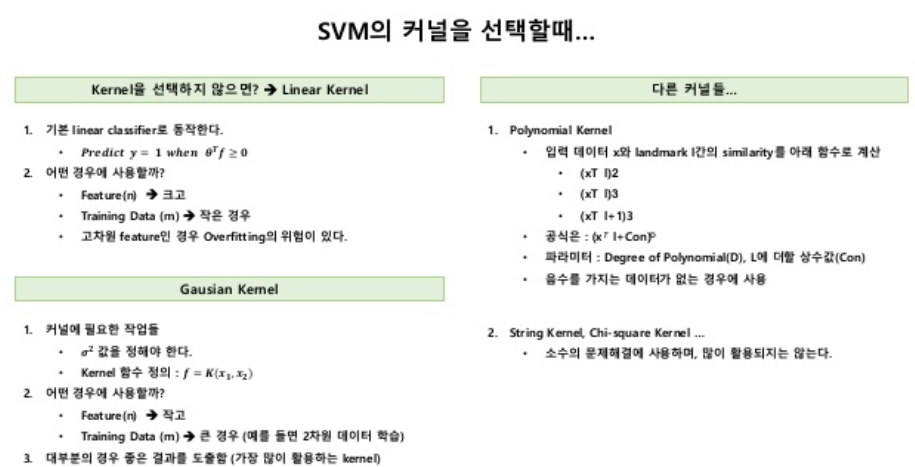
https://m.blog.naver.com/PostView.nhn?blogId=lk3436&logNo=221143463991&proxyReferer=https:%2F%2Fwww.google.com%2F
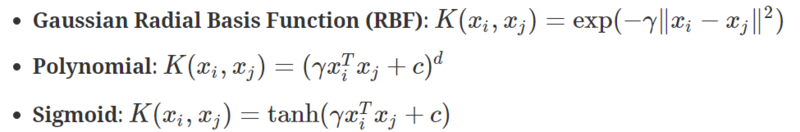
https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/


https://bskyvision.com/163

# 1) Hannanum, Tf-idf

In [273]:
svm_model = SVC(kernel ='linear', C = 1)

# Training 
svm_model.fit(X_train, y_train)

# Evaluation
y_pred = svm_model.predict(X_val)
y_prob = svm_model.decision_function(X_val)

In [317]:
acc = accuracy_score(y_val, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train, y_train) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 0.693
testset accuracy : 62.213



# SVM: class == 무기징역/징역, 무죄/벌금/집행유예

# 1) Hannanum, Tf-idf

In [319]:
svm_model = SVC(kernel ='linear', C = 1)

# Training 
svm_model.fit(X_train5, y_train5)

# Evaluation
y_pred = svm_model.predict(X_val5)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val5, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train5, y_train5) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 0.764
testset accuracy : 71.823



In [353]:
# Tf-idf max_features = 10000
svm_model = SVC(kernel ='linear', C = 1)

# Training 
svm_model.fit(X_train8, y_train8)

# Evaluation
y_pred = svm_model.predict(X_val8)
# y_prob = svm_model.decision_function(X_val8)

acc = accuracy_score(y_val8, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train8, y_train8) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 78.216
testset accuracy : 71.788



In [12]:
# Tf-idf max_features = 7000
svm_model = SVC(kernel ='linear', C = 1)

# Training 
svm_model.fit(X_train9, y_train9)

# Evaluation
y_pred = svm_model.predict(X_val9)
# y_prob = svm_model.decision_function(X_val9)

acc = accuracy_score(y_val9, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train9, y_train9) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 77.211
testset accuracy : 71.656



In [16]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 1, gamma = 1)

# Training 
svm_model.fit(X_train5, y_train5)

# Evaluation
y_pred = svm_model.predict(X_val5)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val5, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train5, y_train5) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 85.255
testset accuracy : 71.469



In [17]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 1, gamma = 0.1)

# Training 
svm_model.fit(X_train5, y_train5)

# Evaluation
y_pred = svm_model.predict(X_val5)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val5, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train5, y_train5) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

KeyboardInterrupt: 

# 2) Kkma, Tf-idf

In [13]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='linear', C = 1)

# Training 
svm_model.fit(X_train_1, y_train_1)

# Evaluation
y_pred = svm_model.predict(X_val_1)
# y_prob = svm_model.decision_function(X_val_1)

acc = accuracy_score(y_val_1, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_1, y_train_1) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 75.817
testset accuracy : 71.580



# SVM: class == 유죄, 무죄

In [32]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='linear', C = 1)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val_1)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 90.685
testset accuracy : 88.907



In [36]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='linear', C = 10)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation

y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val_1)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 91.797
testset accuracy : 88.172



In [33]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 1, gamma = 0.1)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 88.045
testset accuracy : 87.610



# best

In [34]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 10, gamma = 0.1)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 92.349
testset accuracy : 89.232



In [27]:
# Tf-idf max_features = 6000
svm_model = SVC(kernel ='rbf', C = 10, gamma = 0.1)

# Training 
svm_model.fit(X_train_3, y_train_3)

# Evaluation
y_pred = svm_model.predict(X_val_3)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_3, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_3, y_train_3) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 92.610
testset accuracy : 89.267



In [30]:
# Tf-idf max_features = 6000
svm_model = SVC(kernel ='rbf', C = 10, gamma = 0.1)

# Training 
svm_model.fit(X_train_4, y_train_4)

# Evaluation
y_pred = svm_model.predict(X_val_4)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_4, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_4, y_train_4) * 100))
print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 92.774
testset accuracy : 88.906



In [24]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 10, gamma = 0.01)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))

print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 88.320
testset accuracy : 87.811



In [25]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 1, gamma = 1)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))

print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 94.638
testset accuracy : 89.122



In [26]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 100, gamma = 0.1)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))

print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 96.155
testset accuracy : 88.290



In [31]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 100, gamma = 0.01)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))

print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 91.305
testset accuracy : 88.900



In [32]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 1000, gamma = 0.01)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))

print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 92.907
testset accuracy : 88.192



In [33]:
# Tf-idf max_features = 5000
svm_model = SVC(kernel ='rbf', C = 1000, gamma = 0.001)

# Training 
svm_model.fit(X_train_2, y_train_2)

# Evaluation
y_pred = svm_model.predict(X_val_2)
# y_prob = svm_model.decision_function(X_val5)

acc = accuracy_score(y_val_2, y_pred)
# Result
print("trainingset accuracy : %.3f" % (svm_model.score(X_train_2, y_train_2) * 100))

print("testset accuracy : {:.3f}".format(acc*100),end='\n\n')

trainingset accuracy : 91.165
testset accuracy : 88.920



In [ ]:
parameters = [{'C':[1, 10, 100, 1000], 'kernel':['linear']},
              {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.5, 0,1, 0.01, 0.001]}]

svc_model = SVC(random_state = 0)

grid_cv = GridSearchCV(estimator = svc_model,
                           param_grid = parameters,h
                           scoring = 'accuracy',
                           cv = 10 )

grid_cv.fit(X_train_2, y_train_2)
print('최적 하이퍼 파라미터: ', grid_cv.best_paramis_)
print('최고 예측 정확도: {:.3f}'.format(grid_cv.best_score_ * 100))

# Random Forest

n_estimators<br>
- 결정트리의 갯수를 지정
- Default = 10
- 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음


min_samples_split<br>
- 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가


min_samples_leaf<br>
- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요


max_features<br>
- 최적의 분할을 위해 고려할 최대 feature 개수
- Default = 'auto' (결정트리에서는 default가 none이었음)
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중
- sqrt 또는 auto : 전체 피처 중 sqrt(피처개수) 만큼 선정
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정


max_depth<br>
- 트리의 최대 깊이
- default = None → 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요


max_leaf_nodes<br>
- 리프노드의 최대 개수


<br><br>
**defalut**
```Python
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
```




In [382]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [10, 30, 50, 70],
           'min_samples_leaf' : [2, 4, 6],
           'min_samples_split' : [20, 25, 30]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_model = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train5, y_train5)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.3f}'.format(grid_cv.best_score_ * 100))

최적 하이퍼 파라미터:  {'max_depth': 70, 'min_samples_leaf': 6, 'min_samples_split': 30, 'n_estimators': 100}
최고 예측 정확도: 70.604


In [369]:
# class: 징역/무기징역, 무죄, 벌금, 집행유예
# Tf-idf max_features = 5000
rf_model = RandomForestClassifier(random_state = 0, 
                                  n_estimators = 100, 
                                  max_depth = 50, 
                                  min_samples_leaf = 4,
                                  min_samples_split = 25)
rf_model.fit(X_train5, y_train5)
y_pred = rf_model.predict(X_val5)
acc = accuracy_score(y_val5 , y_pred)
print('trainingset accuracy: {0:.3f}'.format(rf_model.score(X_train5, y_train5) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

trainingset accuracy: 81.308
testset accuracy: 70.055


In [381]:
params = { 'n_estimators' : [50, 100],
           'max_depth' : [10, 30, 50, 70],
           'min_samples_leaf' : [2, 4, 6],
           'min_samples_split' : [20, 25, 30]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_model = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train9, y_train9)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.3f}'.format(grid_cv.best_score_ * 100))

최적 하이퍼 파라미터:  {'max_depth': 70, 'min_samples_leaf': 6, 'min_samples_split': 25, 'n_estimators': 100}
최고 예측 정확도: 70.509


In [383]:
# class: 징역/무기징역, 무죄/벌금/집행유예
# Tf-idf max_features = 7000
rf_model = RandomForestClassifier(random_state = 0, 
                                  n_estimators = 100, 
                                  max_depth = 70, 
                                  min_samples_leaf = 6,
                                  min_samples_split = 25)
rf_model.fit(X_train9, y_train9)
y_pred = rf_model.predict(X_val9)
acc = accuracy_score(y_val9, y_pred)
print('trainingset accuracy: {0:.3f}'.format(rf_model.score(X_train9, y_train9) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

trainingset accuracy: 81.061
testset accuracy: 70.547


# 유죄/무죄

In [18]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [10, 30, 50, 70],
           'min_samples_leaf' : [2, 4, 6],
           'min_samples_split' : [20, 25, 30]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_model = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train_2, y_train_2)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.3f}'.format(grid_cv.best_score_ * 100))

최적 하이퍼 파라미터:  {'max_depth': 70, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 10}
최고 예측 정확도: 85.619


In [22]:
params = { 'n_estimators' : [10, 20],
           'max_depth' : [60, 70, 80],
           'min_samples_leaf' : [2, 4, 6],
           'min_samples_split' : [40, 50, 60]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_model = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train_2, y_train_2)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.3f}'.format(grid_cv.best_score_ * 100))

최적 하이퍼 파라미터:  {'max_depth': 70, 'min_samples_leaf': 4, 'min_samples_split': 40, 'n_estimators': 10}
최고 예측 정확도: 85.699


In [23]:
rf_model = RandomForestClassifier(random_state = 0, 
                                  n_estimators = 10, 
                                  max_depth = 70, 
                                  min_samples_leaf = 4,
                                  min_samples_split = 40)
rf_model.fit(X_train_2, y_train_2)
y_pred = rf_model.predict(X_val_2)
acc = accuracy_score(y_val_2, y_pred)
print('trainingset accuracy: {0:.3f}'.format(rf_model.score(X_train_2, y_train_2) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

trainingset accuracy: 89.745
testset accuracy: 85.696


# class 데이터 불균형 문제 해결 방법

# resampling
https://joonable.tistory.com/27

# 

In [7]:
scaler = MaxAbsScaler()
scaler.fit_transform(X_train5)
X_train_tmp = scaler.fit_transform(X_train5)

In [9]:
# 모델설정
sm = SMOTE()

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X_train_tmp,list(y_train5))

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(y_resampled.count('무죄/벌금/집행유예')))
print("After OverSampling, counts of label '0': {}".format(y_resampled.count('징역/무기징역')))

After OverSampling, the shape of train_X: (63492, 5000)
After OverSampling, the shape of train_y: (63492, 5000) 

After OverSampling, counts of label '1': 31746
After OverSampling, counts of label '0': 31746


# MLP

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [18]:
model = Sequential()
model.add(Dense(10, input_shape=(30,), activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['acc'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train_2, y_train_2, batch_size=90, epochs=1000, verbose=1)

InvalidArgumentError: indices[2] = [0,2900] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [25]:
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=0)  
mlp.fit(X_train_2, y_train_2)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [30]:
prediction = mlp.predict(X_val_2)
acc = accuracy_score(y_val_2, prediction)
print('trainingset accuracy: {0:.3f}'.format(mlp.score(X_train_2, y_train_2) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

trainingset accuracy: 96.124
testset accuracy: 86.085


In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000, random_state=0)  
mlp.fit(X_train_2, y_train_2)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000, random_state=0)

In [32]:
prediction = mlp.predict(X_val_2)
acc = accuracy_score(y_val_2, prediction)
print('trainingset accuracy: {0:.3f}'.format(mlp.score(X_train_2, y_train_2) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

trainingset accuracy: 96.282
testset accuracy: 87.069


In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10000, solver='adam', random_state=0)  
mlp.fit(X_train_2, y_train_2)

MLPClassifier(max_iter=10000, random_state=0)

In [38]:
prediction = mlp.predict(X_val_2)
acc = accuracy_score(y_val_2, prediction)
print('trainingset accuracy: {0:.3f}'.format(mlp.score(X_train_2, y_train_2) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

trainingset accuracy: 96.249
testset accuracy: 87.693


In [39]:
mlp = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=10000, random_state=0)  
mlp.fit(X_train_2, y_train_2)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=0)

In [40]:
prediction = mlp.predict(X_val_2)
acc = accuracy_score(y_val_2, prediction)
print('trainingset accuracy: {0:.3f}'.format(mlp.score(X_train_2, y_train_2) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

trainingset accuracy: 96.206
testset accuracy: 86.438


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10000, random_state=0)  
mlp.fit(X_train_2, y_train_2)

In [ ]:
prediction = mlp.predict(X_val_2)
acc = accuracy_score(y_val_2, prediction)
print('trainingset accuracy: {0:.3f}'.format(mlp.score(X_train_2, y_train_2) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

In [ ]:
mlp = MLPClassifier()
params = {
    'hidden_layer_sizes': [(10,30,10), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01],
    'max_iter': [1000, 10000]
}

grid_cv = GridSearchCV(mlp, param_grid=params, n_jobs=-1, cv=5)
grid_cv.fit(X_train_2, y_train_2) 

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.3f}'.format(grid_cv.best_score_ * 100))

In [43]:
mlp = MLPClassifier()
params = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'alpha': [0.0001, 0.01],
    'max_iter': [1000]
}

grid_cv = GridSearchCV(mlp, param_grid=params, n_jobs=-1, cv=5)
grid_cv.fit(X_train_2, y_train_2) 

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.3f}'.format(grid_cv.best_score_ * 100))

최적 하이퍼 파라미터:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'solver': 'sgd'}
최고 예측 정확도: 88.455


In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                    activation='tanh',
                    solver='sgd',
                    alpha=0.01,
                    max_iter=1000, 
                    random_state=0) 
# Training
mlp.fit(X_train_2, y_train_2)

#Evaluation
prediction = mlp.predict(X_val_2)
acc = accuracy_score(y_val_2, prediction)

#Result
print('trainingset accuracy: {0:.3f}'.format(mlp.score(X_train_2, y_train_2) * 100))
print('testset accuracy: {0:.3f}'.format(acc * 100))

trainingset accuracy: 90.347
testset accuracy: 88.844


# word2vec

In [244]:
data = pd.read_excel("tokenization.xlsx", index_col = 0)
text = data['Hannanum'].copy()

In [246]:
texts = list(text)
textWord2v = []
for t in texts:
    textWord2v.append(str(t).split())

In [251]:
from gensim.models import word2vec
import logging

In [261]:
# 학습 진행 상황 확인
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

In [262]:
print("Training model")
model = word2vec.Word2Vec(textWord2v, workers = 4, size = 350, min_count = 40, window = 10, sample = 1e-3)

2020-11-20 16:08:46,822 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-11-20 16:08:46,824 : INFO : collecting all words and their counts
2020-11-20 16:08:46,826 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model


2020-11-20 16:08:47,187 : INFO : PROGRESS: at sentence #10000, processed 1576086 words, keeping 65443 word types
2020-11-20 16:08:47,479 : INFO : PROGRESS: at sentence #20000, processed 2843452 words, keeping 98237 word types
2020-11-20 16:08:47,962 : INFO : PROGRESS: at sentence #30000, processed 4654415 words, keeping 144571 word types
2020-11-20 16:08:48,477 : INFO : PROGRESS: at sentence #40000, processed 6353145 words, keeping 178773 word types
2020-11-20 16:08:48,879 : INFO : PROGRESS: at sentence #50000, processed 7750380 words, keeping 239577 word types
2020-11-20 16:08:49,340 : INFO : PROGRESS: at sentence #60000, processed 9454305 words, keeping 248455 word types
2020-11-20 16:08:49,841 : INFO : PROGRESS: at sentence #70000, processed 11332681 words, keeping 259861 word types
2020-11-20 16:08:50,436 : INFO : PROGRESS: at sentence #80000, processed 13345317 words, keeping 301173 word types
2020-11-20 16:08:50,918 : INFO : PROGRESS: at sentence #90000, processed 15179724 words,

2020-11-20 16:09:51,297 : INFO : EPOCH 2 - PROGRESS: at 93.57% examples, 466581 words/s, in_qsize 8, out_qsize 1
2020-11-20 16:09:52,302 : INFO : EPOCH 2 - PROGRESS: at 98.03% examples, 468673 words/s, in_qsize 7, out_qsize 0
2020-11-20 16:09:52,848 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-11-20 16:09:52,865 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-11-20 16:09:52,887 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-11-20 16:09:52,889 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-11-20 16:09:52,890 : INFO : EPOCH - 2 : training on 15196282 raw words (12680483 effective words) took 27.0s, 469798 effective words/s
2020-11-20 16:09:53,907 : INFO : EPOCH 3 - PROGRESS: at 3.24% examples, 443297 words/s, in_qsize 7, out_qsize 0
2020-11-20 16:09:54,913 : INFO : EPOCH 3 - PROGRESS: at 7.17% examples, 446402 words/s, in_qsize 8, out_qsize 0
2020-11-20 16:09:55,921 : INFO : EPOCH 3 - PRO

2020-11-20 16:10:54,170 : INFO : EPOCH 5 - PROGRESS: at 37.91% examples, 497349 words/s, in_qsize 7, out_qsize 0
2020-11-20 16:10:55,177 : INFO : EPOCH 5 - PROGRESS: at 41.26% examples, 492072 words/s, in_qsize 7, out_qsize 0
2020-11-20 16:10:56,198 : INFO : EPOCH 5 - PROGRESS: at 45.53% examples, 495080 words/s, in_qsize 8, out_qsize 0
2020-11-20 16:10:57,224 : INFO : EPOCH 5 - PROGRESS: at 50.75% examples, 493296 words/s, in_qsize 6, out_qsize 1
2020-11-20 16:10:58,232 : INFO : EPOCH 5 - PROGRESS: at 56.14% examples, 493687 words/s, in_qsize 8, out_qsize 0
2020-11-20 16:10:59,237 : INFO : EPOCH 5 - PROGRESS: at 59.72% examples, 495957 words/s, in_qsize 7, out_qsize 0
2020-11-20 16:11:00,268 : INFO : EPOCH 5 - PROGRESS: at 64.40% examples, 497234 words/s, in_qsize 8, out_qsize 0
2020-11-20 16:11:01,296 : INFO : EPOCH 5 - PROGRESS: at 68.18% examples, 499293 words/s, in_qsize 7, out_qsize 0
2020-11-20 16:11:02,318 : INFO : EPOCH 5 - PROGRESS: at 72.49% examples, 499297 words/s, in_qsiz

In [263]:
print(model.wv.vectors.shape)

(22172, 350)


In [264]:
def GetFeatures(words, model, num_features):
    # 출력 벡터 초기화
    feature_vector = np.zeros((num_features), dtype = np.float32)
    
    num_words = 0
    #어휘사전 준비
    index2word_set = set(model.wv.index2word)
    
    for word in words:
        if word in index2word_set:
            num_words += 1
            # 사전에 해당하는 단어에 대해 단어 벡터 더함
            featrue_vector = np.add(feature_vector, model[word])
    
    # 문장의 단어 수만큼 나누어 단어 벡터의 평균값을 문장 벡터로 함
    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [265]:
def GetDataset(texts, model, num_features):
    dataset = list()
    
    for text in texts:
        dataset.append(GetFeatures(text, model, num_features))
    
    reviewFeatureVecs = np.stack(dataset)
    
    return reviewFeatureVecs

In [266]:
test_data_vecs = GetDataset(textWord2v ,model, 350)

C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
C:\Users\tjswn\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [267]:
X = test_data_vecs
y = np.array(sentences)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [268]:
print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)
print(X_val4.shape)
print(y_val4.shape)

(57689, 350)
(18029, 350)
(57689,)
(18029,)
(14423, 350)
(14423,)


In [269]:
# 학습 완료 후 필요없는 메모리 unload
model.init_sims(replace=True)

2020-11-20 16:22:19,511 : INFO : precomputing L2-norms of word weight vectors
